In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from IPython.display import Image
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier


### Import the above libraries Using pip install command on your terminal 
### Plese Ensure that you have downloaded python version 3.10
For more about github Visit Click [HERE](https://www.freecodecamp.org/news/introduction-to-git-and-github/)
you don't need to memories the commands 

you just need to [install Visual studion](https://code.visualstudio.com/download) code and download these extension from inside Visual studion code

Extension 1: Git Graph
Extension 2: GitLens

or you can down loada GIT Kraken If you are planning to use another [editor](https://www.gitkraken.com/download)
[Kiggle Dataset](https://www.gitkraken.com/download)

### This block is for Descriping different aspects of the Data set

In [9]:
os.rename("Data/PS_20174392719_1491204439457_log.csv","Data/Online_Fraud.csv") #renaming the file from kiggle

FileNotFoundError: [WinError 2] The system cannot find the file specified: 'Data/PS_20174392719_1491204439457_log.csv' -> 'Data/Online_Fraud.csv'

In [5]:
DB_Original = pd.read_csv("Data/Online_Fraud.csv") #read the data srt and save it to a var

In [12]:
DB_Original.head(10) # first 10 rows


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [11]:
DB_Original.tail(10) # last 10 rows

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362610,742,TRANSFER,63416.99,C778071008,63416.99,0.0,C1812552860,0.00,0.00,1,0
6362611,742,CASH_OUT,63416.99,C994950684,63416.99,0.0,C1662241365,276433.18,339850.17,1,0
6362612,743,TRANSFER,1258818.82,C1531301470,1258818.82,0.0,C1470998563,0.00,0.00,1,0
6362613,743,CASH_OUT,1258818.82,C1436118706,1258818.82,0.0,C1240760502,503464.50,1762283.33,1,0
6362614,743,TRANSFER,339682.13,C2013999242,339682.13,0.0,C1850423904,0.00,0.00,1,0
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [6]:
DB_Original.shape # how many rows asd columns

(6362620, 11)

In [7]:
DB_Original.info() # what are the types of columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [11]:
DB_Original.describe() # this will give general statistics

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [89]:
DB_Original.isnull().sum() # we have no null valuse

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [8]:
DB_Original.type.value_counts() # what are the the valuse redundency in column type



type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

### Visualization

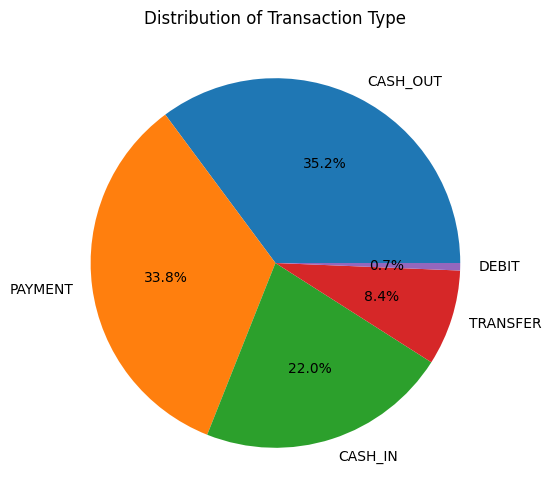

In [9]:
#This will help us determine which type are we mostly dealing with
type = DB_Original["type"].value_counts() # same as above
transactions = type.index # store keys of type
quantity = type.values # store values of type

# Create a pie chart
plt.figure(figsize=(10,6))
plt.pie(quantity, labels = transactions, autopct='%1.1f%%')
plt.title("Distribution of Transaction Type")
plt.show()

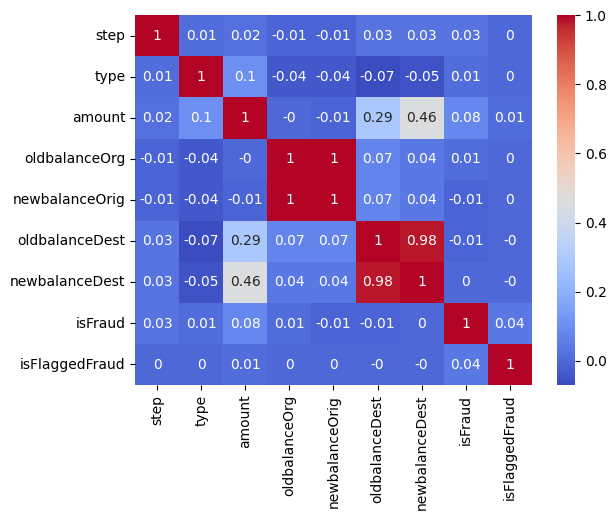

In [22]:
# we foucus on the is fraud column to choose wich would be used as feature 
correlation = DB_Original.corr(numeric_only = True)
sns.heatmap(correlation.round(2), annot=True, cmap='coolwarm');

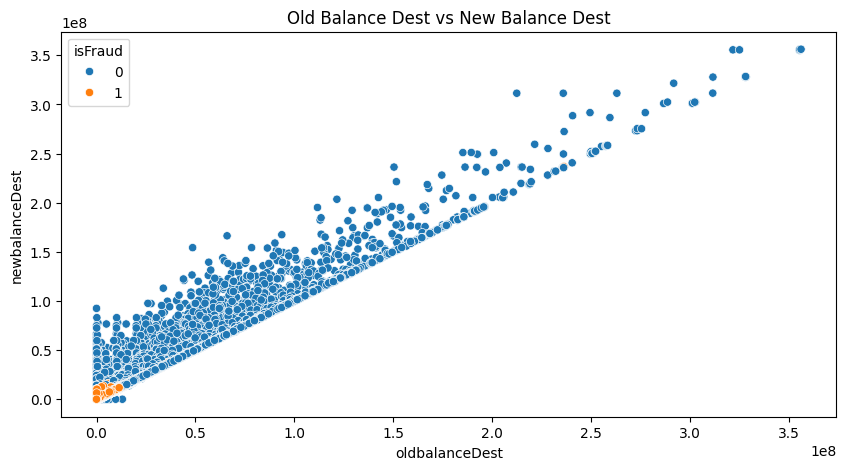

In [9]:
#Visualizing the relationship between 'oldbalanceDest' and 'newbalanceDest'
# we notice that most fraud users have 0 money as old balance wich make sense and new balance
# in a non fraud situation the old and new balance increace proportionally 
plt.figure(figsize=(10,5))
sns.scatterplot(x='oldbalanceDest', y='newbalanceDest', hue='isFraud', data=DB_Original)
plt.title('Old Balance Dest vs New Balance Dest')
plt.show()

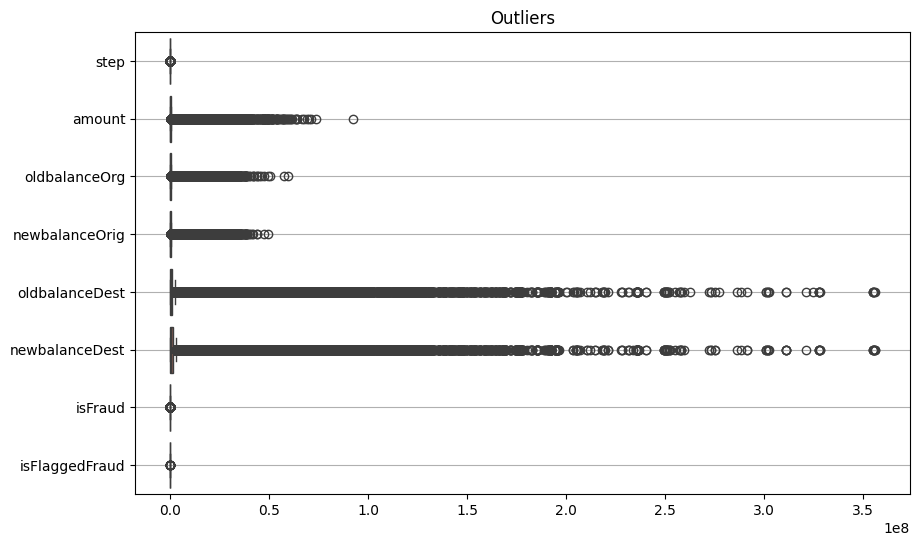

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=DB_Original, orient='h') # horizontal
plt.title('Outliers')
plt.grid(axis='y')
plt.show()

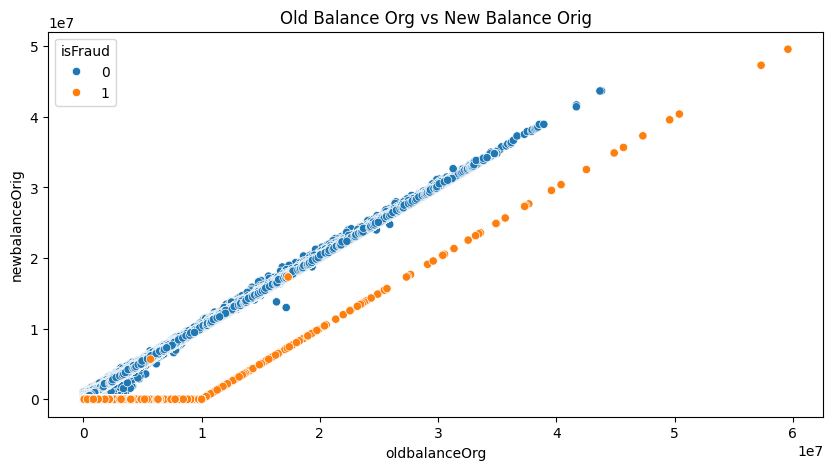

In [116]:
#Visualizing the relationship between 'oldbalanceOrg' and 'newbalanceOrig'
# in a case of fraud the new balance drops by lage margine wich make it shife to the right 
plt.figure(figsize=(10,5))
sns.scatterplot(x='oldbalanceOrg', y='newbalanceOrig', hue='isFraud', data=DB_Original)
plt.title('Old Balance Org vs New Balance Orig')
plt.show()

# Basic filtering techniques 

In [29]:
DB_Original["type"] = DB_Original["type"].replace({"CASH_OUT": 1, "CASH_IN":2,"PAYMENT":3,"TRANSFER":4,"DEBIT":5}) # to rename the values 

C:\Users\ABOOD\AppData\Local\Temp\ipykernel_20844\3149522874.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  DB_Original["type"] = DB_Original["type"].replace({"CASH_OUT": 1, "CASH_IN":2,"PAYMENT":3,"TRANSFER":4,"DEBIT":5})


In [27]:
DB_Original["isFraud"] = DB_Original["isFraud"].replace({1: "Fraud", 0:"Not Fraud"}) # to rename the values 

In [ ]:

point = [0, 1]
plt.plot(point[0], point[1], "o")
plt.title("Point (0, 1)")
plt.show()

## ML model 

In [31]:
x = np.array(DB_Original[["step","type","amount","oldbalanceOrg","newbalanceOrig"]])
y = np.array(DB_Original[["isFraud"]])

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.15,random_state=42) 
#If you don't specify the random_state in your code, then every time you run(execute) your code a new random value is generated and the train and test datasets would have different values each time.
#However, if a fixed value is assigned like random_state = 42 then no matter how many times you execute your code the result would be the same .i.e, same values in train and test datasets.

In [34]:
model1DTC = DecisionTreeClassifier()
model2LR = LogisticRegression()
model3RAC = RandomForestClassifier()
model4KNC = KNeighborsClassifier()
model1DTC.fit(x_train,y_train.ravel())# to unify domensions
model2LR.fit(x_train,y_train.ravel())# to unify  domensions
model3RAC.fit(x_train,y_train.ravel())# to unify domensions
model4KNC.fit(x_train,y_train.ravel())# to unify domensions

KNeighborsClassifier()

In [35]:
print("DecisionTreeClassifier score: ",model1DTC.score(x_test,y_test))
print("LogisticRegression score: ",model2LR.score(x_test,y_test))
print("RandomForestClassifier score: ",model3RAC.score(x_test,y_test))
print("RandomForestClassifier score: ",model4KNC.score(x_test,y_test))

DecisionTreeClassifier score:  0.9996364181212561
LogisticRegression score:  0.9990789957596085
RandomForestClassifier score:  0.999676234004231
RandomForestClassifier score:  0.9996657561402902


In [37]:
#"step","type","amount","oldbalanceOrg","newbalanceOrig"
features = np.array([[1,3,9839.64,170136.00,160296.36]])
print(model1DTC.predict(features))
print(model2LR.predict(features))
print(model3RAC.predict(features))
print(model4KNC.predict(features))



['Not FraudIs']
['Not FraudIs']
['Not FraudIs']
['Not FraudIs']


In [43]:

features2 = np.array([[1,4,181.00,181.00,0.00]])
print(model1DTC.predict(features2))
print(model2LR.predict(features2))
print(model3RAC.predict(features2))
print(model4KNC.predict(features2))

['Fraud']
['Not FraudIs']
['Fraud']
['Fraud']


In [36]:
DB_Original.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,Not FraudIs,0
1,1,3,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,Not FraudIs,0
2,1,4,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,Fraud,0
3,1,1,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,Fraud,0
4,1,3,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,Not FraudIs,0
5,1,3,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,Not FraudIs,0
6,1,3,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,Not FraudIs,0
7,1,3,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,Not FraudIs,0
8,1,3,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,Not FraudIs,0
9,1,5,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,Not FraudIs,0
